# DATA ANALYTICS PROJECT 

# Step-1:Business Problem

- restraunt owner wants detailed report on sales  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Step-2:Load the data

In [9]:
df=pd.read_excel("tips.xlsx")

In [12]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**data exploration**

- understanding the given data very clearly

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [17]:
df.columns.tolist()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [19]:
continuous  = ['total_bill', 'tip']              #interval means take continuous 

categorical = ['sex', 'smoker', 'day', 'time']

count = ['size']      

single value makes sense means barplot

interval/continuous making sense means histogram

histogram is only applicable for continuous variable 

for discrete variables we will apply unique values/ value counts

In [22]:
df["total_bill"].describe()            #for continous variables describe

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [24]:
df["total_bill"].unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

In [26]:
df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [28]:
df["tip"].unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75])

In [30]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [34]:
df["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [38]:
df["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [40]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [42]:
df["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [44]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [45]:
df["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [46]:
df["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [50]:
df[continuous].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [52]:
df[categorical].describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


# Step-3 : Data preprocessing

**drop duplicates**

In [56]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


**df.drop_duplicated()**

first observe if you feel any thing is duplicated then drop

In [59]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

**treat outliers**

<Axes: ylabel='total_bill'>

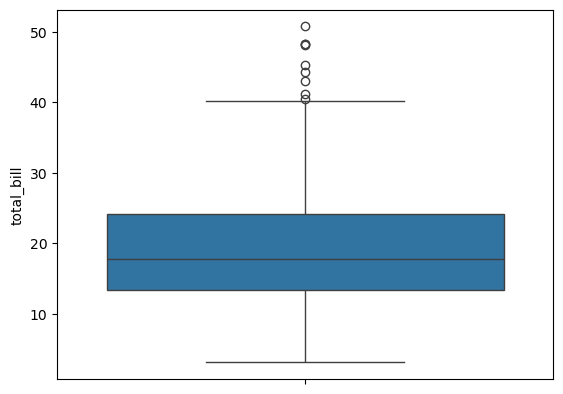

In [62]:
sns.boxplot(df["total_bill"])    #retrain meaning in outliers is keep it as it is 

<Axes: ylabel='tip'>

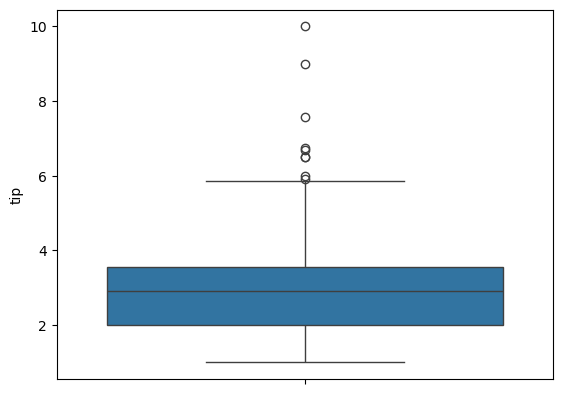

In [63]:
sns.boxplot(df["tip"])

# Step-4 :Analysis
- pandas and seaborn

<Axes: xlabel='total_bill', ylabel='Count'>

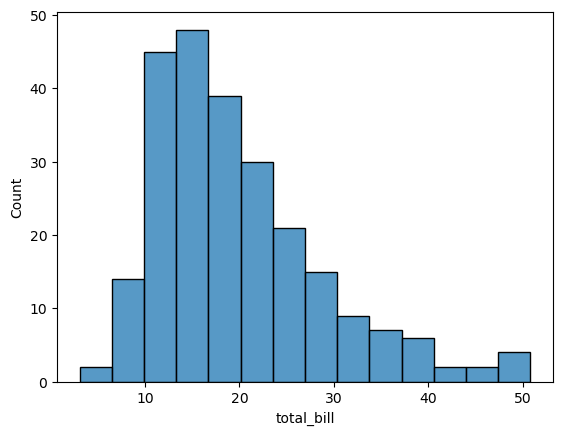

In [67]:
#what type of people are having more bill amaount?

sns.histplot(df["total_bill"])   # observation : more number of people are between 10-20 dollors 
#it is rightskewed distribution means higher the value you go lesser the people 

<Axes: xlabel='total_bill', ylabel='Count'>

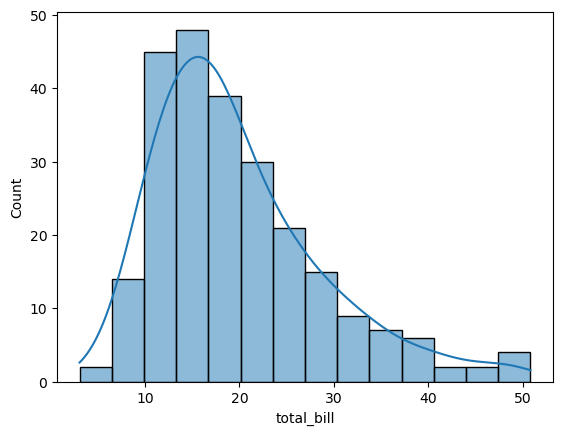

In [68]:
#for the above if we want density curve we can get so that we can knew which side tail is there and which side it is skewed

sns.histplot(df["total_bill"],kde=True)

# observations

- more number of customers make bill Amount between 10-20
- less number of customers make bill Amount more than 40
- in histogram advantage is we can see distribution of Data

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

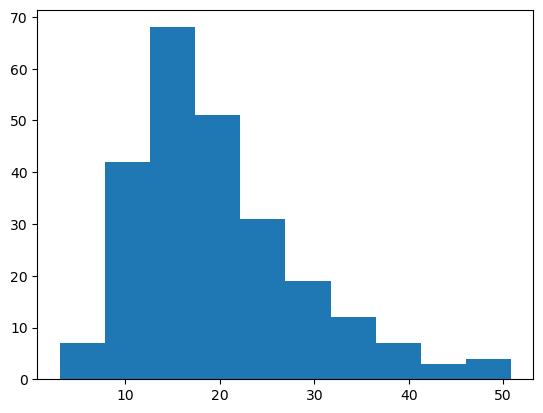

In [71]:
#suppose for the above graph if we consider as plt instead of sns

plt.hist(df["total_bill"])                    # it is very raw compared to above, x and y labels are not present

In [73]:
#if we want total bill in terms of sex

df.groupby("sex")["total_bill"].mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [76]:
#if we want every thing at aplace we can use describe

df.groupby("sex")["total_bill"].describe().transpose()  #transpose is to convert columns to rows and rows to columns

sex,Female,Male
count,87.000000,157.000000
mean,18.056897,20.744076
std,8.009209,9.246469
min,3.070000,7.250000
25%,12.750000,14.000000
50%,16.400000,18.350000
75%,21.520000,24.710000
max,44.300000,50.810000


In [78]:
df.groupby("smoker")["total_bill"].describe().transpose()

smoker,No,Yes
count,151.000000,93.000000
mean,19.188278,20.756344
std,8.255582,9.832154
min,7.250000,3.070000
25%,13.325000,13.420000
50%,17.590000,17.920000
75%,22.755000,26.860000
max,48.330000,50.810000


In [80]:
df.groupby("day")["total_bill"].describe().transpose()

day,Fri,Sat,Sun,Thur
count,19.000000,87.000000,76.000000,62.000000
mean,17.151579,20.441379,21.410000,17.682742
std,8.302660,9.480419,8.832122,7.886170
min,5.750000,3.070000,7.250000,7.510000
25%,12.095000,13.905000,14.987500,12.442500
50%,15.380000,18.240000,19.630000,16.200000
75%,21.750000,24.740000,25.597500,20.155000
max,40.170000,50.810000,48.170000,43.110000


# observations

- more number of customers make bill Amount between 10-20
- less number of customers make bill Amount more than 40
- in histogram advantage is we can see distribution of Data

# scatter plot

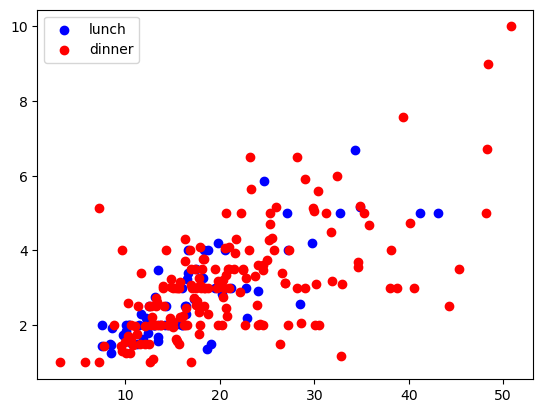

In [88]:
lunch = df[df["time"]=="Lunch"]

dinner = df[df["time"]=="Dinner"]

plt.scatter(x=lunch["total_bill"],y=lunch["tip"],color="blue",label="lunch")
plt.scatter(x=dinner["total_bill"],y=dinner["tip"],color="red",label="dinner")
plt.legend()
plt.show()

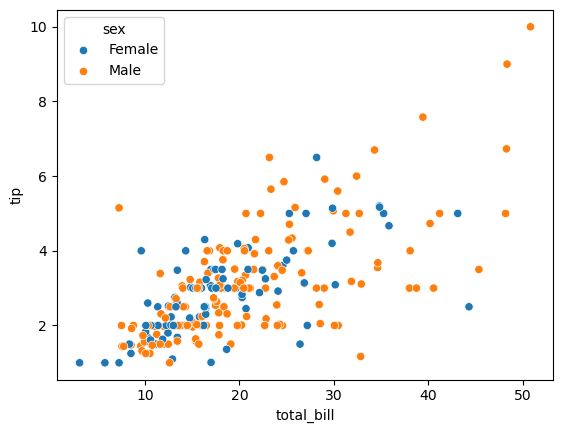

In [90]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["sex"])
plt.show()

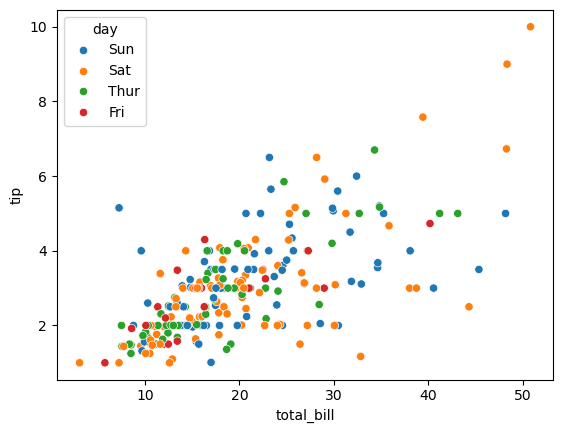

In [92]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["day"])
plt.show()

In [94]:
#heat map applying to the correlation matrix 

c_m=df[["total_bill","tip"]].corr()
c_m

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


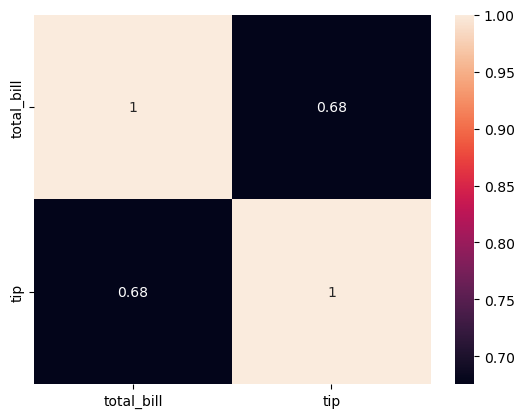

In [96]:
sns.heatmap(c_m,annot=True)
plt.show()